# Cantor set

In [1]:
import numpy as np
import sympy as sy

import src

In [2]:
def cantor_set(
    factor: sy.Expr | list[sy.Expr],
    fix_points: list[sy.Expr],
    measures: list[sy.Expr],
) -> src.SelfAffineSet:
    """Return the cantor set."""

    if isinstance(factor, sy.Expr):
        factors = [factor for _ in range(len(fix_points))]
    else:
        factors = factor

    ifs = [
        src.contractive_similarity(r, sy.eye(1), sy.Matrix([c]))
        for r, c in zip(factors, fix_points, strict=True)
    ]

    return src.SelfAffineSet(ifs, measures, 1)

In [3]:
r = sy.Rational(1, 3)
c = [-1, 1]
p = [sy.Rational(1, 2), sy.Rational(1, 2)]

attractor = cantor_set(r, c, p)

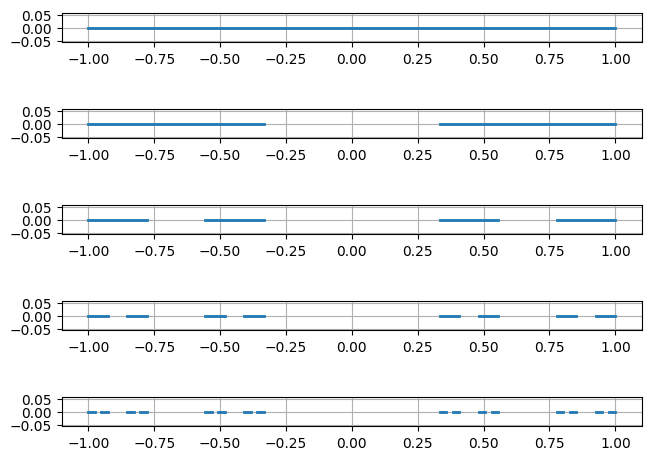

In [4]:
src.render_pre_attractor(attractor, np.array([[-1, 1]]), 4)

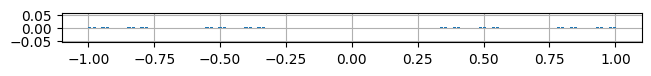

In [5]:
src.render_chaos_game(attractor, 10_000)

In [6]:
tot_deg_max = 4

values = src.compute_polynomial_integral(attractor, tot_deg_max)

src.display_values(values, attractor.space_dim, variables=(sy.symbols("x", real=True),))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
# src.export_to_file(values, attractor, "d1-cantor-set")